In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

1.  Loading helper functions
2.  Load VGG
3. Load Image
4. Rescale image to 224x224x3 (VGG's expectation, why?)
5. Use expand_dims to convert image to a batch of size 1
6. Preprocesing normalizes our input image by subtracting mean RGB values

In [0]:
from google.colab import files

In [5]:
from keras.models import load_model
model = load_model('cifar10_ResNet20v2_model.050 (1).h5')
#model.summary()















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
from skimage import io
images = [
          "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/ANA_777-300_Taking_off_from_JFK.jpg/300px-ANA_777-300_Taking_off_from_JFK.jpg",
          "https://scx1.b-cdn.net/csz/news/800/2019/toomanyairpl.jpg",
          "https://cdn.vox-cdn.com/thumbor/oDdR6AF3DKIp7R73RYAXdLaC68g=/0x0:1280x720/1200x800/filters:focal(538x258:742x462)/cdn.vox-cdn.com/uploads/chorus_image/image/63621787/jetblue1.0.jpg",
          "https://upload.wikimedia.org/wikipedia/commons/3/3f/P-51_Mustang_edit1.jpg",
          "https://resize.hswstatic.com/w_907/gif/plane-crash1-1.jpg",
          "https://blog.klm.com/assets/uploads/2019/09/787-interior-tail-blog-768x510.png",
          "https://i.ytimg.com/vi/UJ6GmaZVFkU/maxresdefault.jpg",
          "https://siliconcanals.com/wp-content/uploads/2019/08/airplane-travel-tip.jpg",
          "https://www.aircraftinteriorsinternational.com/wp-content/uploads/2019/08/frigate-mom.png",
          "https://img.etimg.com/thumb/msid-66183454,width-300,imgsize-136927,resizemode-4/4-innovations-in-the-automobile-world-that-have-changed-the-roads-forever.jpg",
          "https://images.livemint.com/img/2019/08/13/600x338/auto_1565721310421.jpg",
          "https://cdn.hswstatic.com/gif/hybrid-car-ch.jpg",
          "https://invest-india-revamp-static-files.s3.ap-south-1.amazonaws.com/s3fs-public/2018-06/car_7.png",
          "https://images.financialexpress.com/2019/08/cats-728.jpg",
          "https://img.etimg.com/thumb/width-640,height-480,imgsize-171448,resizemode-1,msid-70887068/govts-booster-dose-for-automobile-industry-to-lift-affordable-housing.jpg",
          "https://www.abcconsultants.in/wp-content/uploads/2018/01/Automobile__Auto_Components_707x418-min.jpg",
          "https://static.businessworld.in/article/article_extra_large_image/1456820807_FW0hAT_Automobile_Cars_Reu.jpg",
          "http://www.optimizt.com/wp-content/uploads/2017/10/Automobile-Trims-Design-1349x450.jpg",
          "https://bsmedia.business-standard.com/_media/bs/img/article/2018-07/10/full/1531242402-855.jpg",
          "https://www.hakaimagazine.com/wp-content/uploads/header-gulf-birds.jpg",
          "https://thumbs-prod.si-cdn.com/yxYtidKUcbMprBCzkC3AH2cnUQ4=/420x240/https://public-media.si-cdn.com/filer/54/10/5410da58-2295-4e3a-a847-fecd41cdcdd9/scarlet_tanager.jpg",
          "https://scx1.b-cdn.net/csz/news/800/2019/mostnativebi.jpg",
          "https://upload.wikimedia.org/wikipedia/commons/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg",
          "https://www.audubon.org/sites/default/files/styles/hero_image/public/web_groombaltimoreoriole-and-a-male-red-breasted-grosbeak.jpg?itok=GFL3jy0c",
          "https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg?w968h681",
          "https://www.thespruce.com/thmb/T2zPfMdGGmOMvcco3zp-pH82hao=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/popular-blue-jay-5a6f818fd8fdd50036c5709d.jpg",
          "http://www.imperial.ac.uk/ImageCropToolT4/imageTool/uploaded-images/newseventsimage_1529346275459_mainnews2012_x1.jpg",
          "https://abcbirds.org/wp-content/uploads/2019/09/3billionbird-landing-page-banner.jpg",
          "https://www.scitecheuropa.eu/wp-content/uploads/2019/09/Colour-bird-e1568033112774.jpg",
          "https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg",
          "https://i.ytimg.com/vi/pjRs_WT8VzM/maxresdefault.jpg",
          "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg",
          "https://timesofindia.indiatimes.com/thumb/msid-67586673,width-800,height-600,resizemode-4/67586673.jpg",
          "https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png",
          "https://www.petmd.com/sites/default/files/adult-homeless-cat-asking-for-food-picture-id847415388.jpg",
          "https://resize.hswstatic.com/w_907/gif/tesla-cat.jpg",
          "https://static.boredpanda.com/blog/wp-content/uploads/2018/04/5acb63d83493f__700-png.jpg",
          "https://icatcare.org/app/uploads/2018/06/Layer-1704-1920x840.jpg",
          "https://cdn.britannica.com/40/109040-050-62EEDEA6/Male-white-tailed-deer.jpg",
          "ttps://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2019/02/13/931/524/694940094001_6001731668001_6001731174001-vs.jpg?ve=1&tl=1",
          "https://upload.wikimedia.org/wikipedia/commons/e/ed/Siberian_roe_deer.jpg",
          "https://thenypost.files.wordpress.com/2019/10/deer-tuberculosis-6408.jpg?quality=90&strip=all&w=618&h=410&crop=1",
          "https://tpwd.texas.gov/huntwild/wild/game_management/deer/images/WTD-Headshot.jpg",
          "https://www.humanesociety.org/sites/default/files/styles/1240x698/public/2018/08/deer-279091.jpg?h=7929e2b5&itok=pD15M75M",
          "https://upload.wikimedia.org/wikipedia/commons/b/b7/White-tailed_deer.jpg",
          "https://media.arkansasonline.com/img/photos/2019/06/17/resized_250499-1b-deer-0618_85-26607_t800.JPG?90232451fbcadccc64a17de7521d859a8f88077d",
          "https://huntfish.mdc.mo.gov/sites/default/files/styles/centered_full/public/images/species/deer.jpg?itok=xrM8f6UB",
          "http://blog.humanesociety.org/wp-content/uploads/2017/07/RRE_9574_183341-e1499797561973-1220x815.jpg",
          "https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg",
          "https://www.thesprucepets.com/thmb/wd4VS5A5UCHLF0IBG-DsVfrLypk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg",
          "https://www.recoveryranch.com/wp-content/uploads/2019/08/Horse.jpg",
          "https://thehorse.com/wp-content/uploads/2017/09/paint-horse-running-in-field.jpg",
          "https://ichef.bbci.co.uk/news/660/cpsprodpb/8883/production/_109474943_sind3y.jpg",
          "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/MA_00600259_vpf1m0.jpg",
          "https://i.ytimg.com/vi/ianIz4tKoDA/maxresdefault.jpg",
          "http://agriculture.vic.gov.au/__data/assets/image/0015/255102/horses.jpg"
]

0
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
0
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
0
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
Error when checking input: expected input_6 to have shape (32, 32, 3) but got array with shape (32, 32, 4)
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
HTTP Error 403: Forbidden
Error when checking input: expected input_6 to have shape (32, 32, 3) but got array with shape (32, 32, 4)
3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
Error when checking input: expected input_6 to have shape (32, 32, 3) but got array with shape (32, 32, 4)
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
HTTP Error 403: Forbidden
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)
1
(?, 8, 8, 256)
(256,)
(

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


HTTP Error 403: Forbidden
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


No such file: '/content/ttps:/a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2019/02/13/931/524/694940094001_6001731668001_6001731174001-vs.jpg?ve=1&tl=1'
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


HTTP Error 403: Forbidden
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


HTTP Error 403: Forbidden
1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0
(?, 8, 8, 256)
(256,)
(8, 8, 256)
(8, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


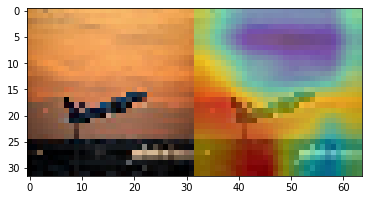

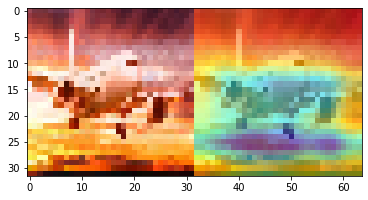

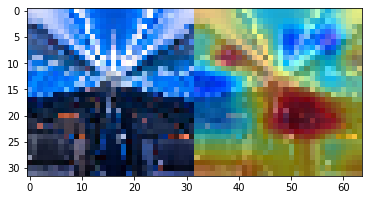

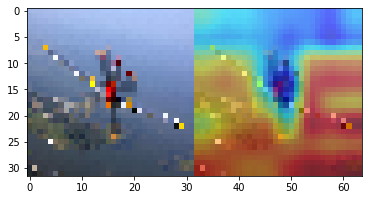

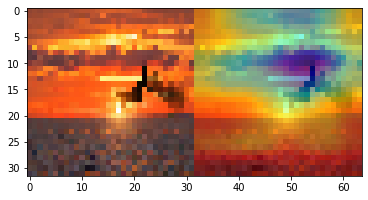

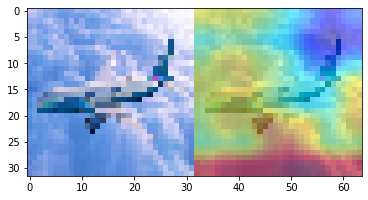

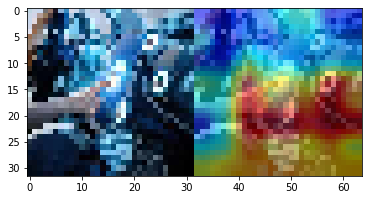

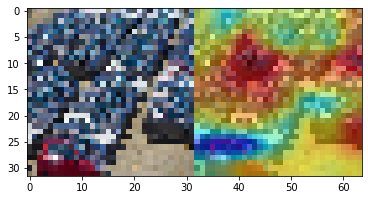

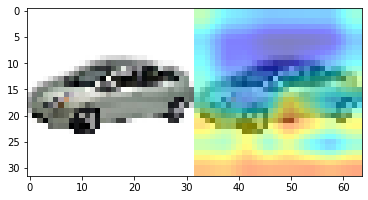

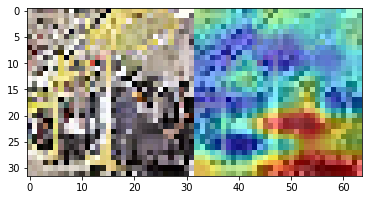

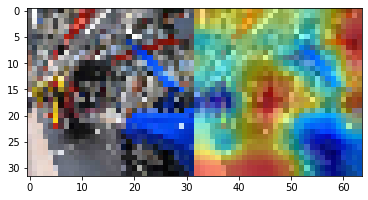

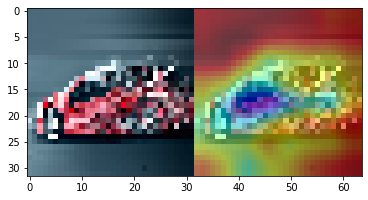

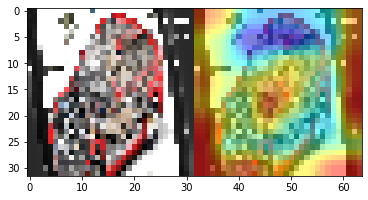

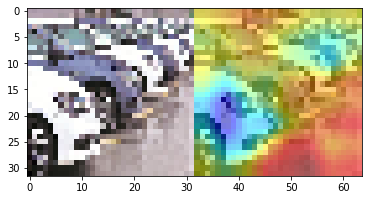

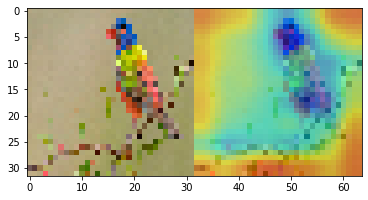

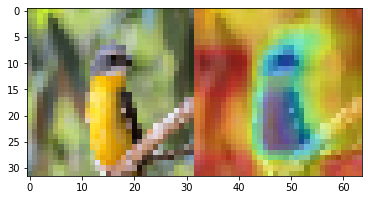

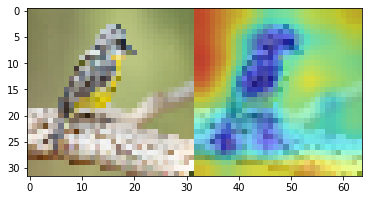

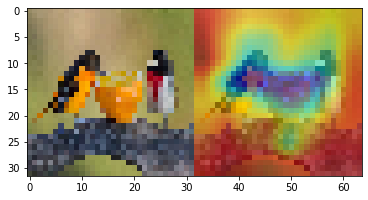

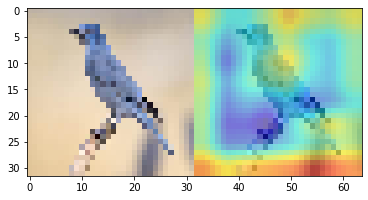

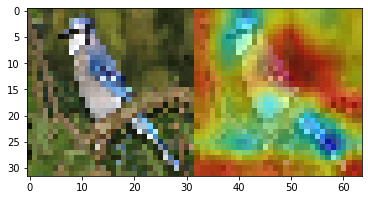

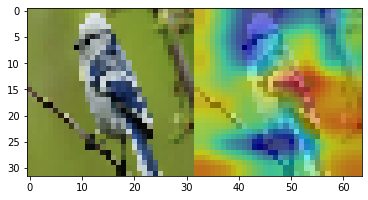

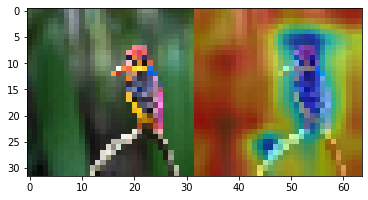

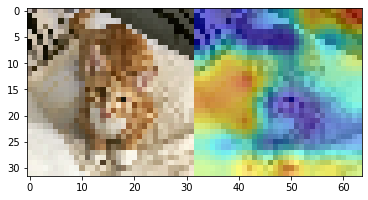

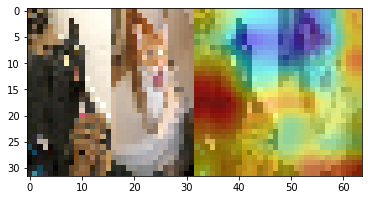

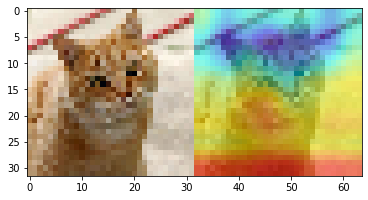

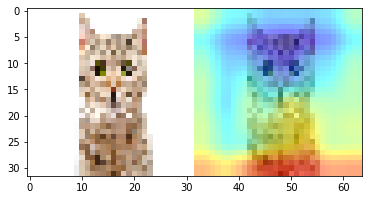

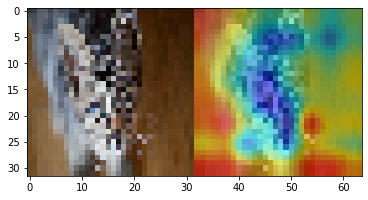

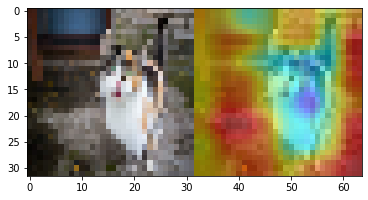

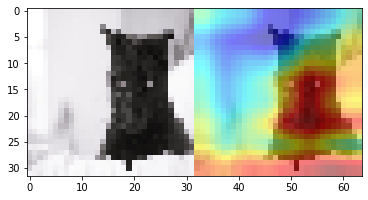

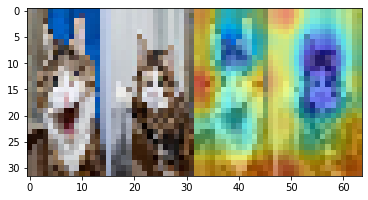

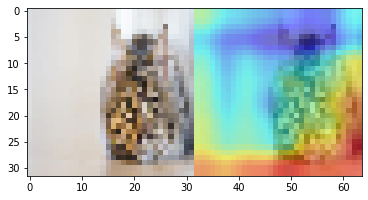

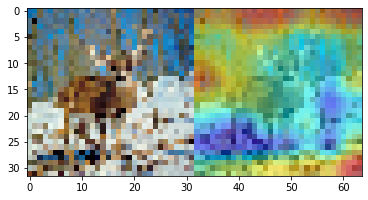

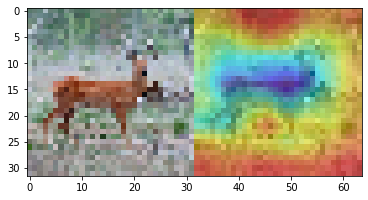

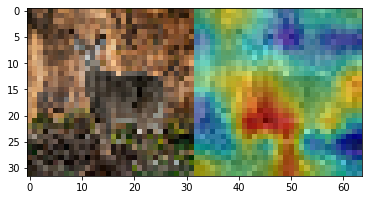

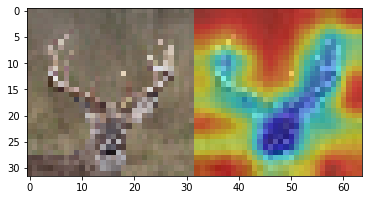

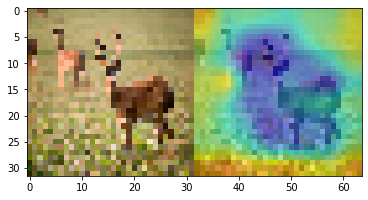

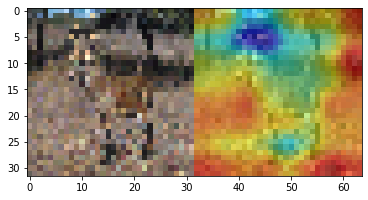

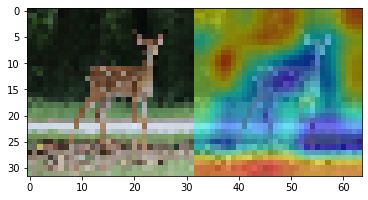

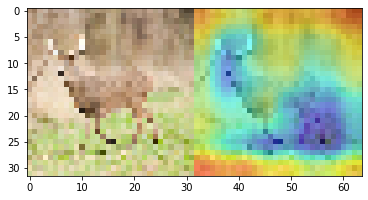

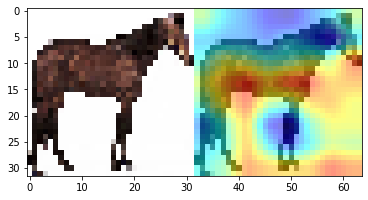

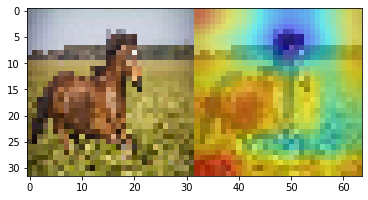

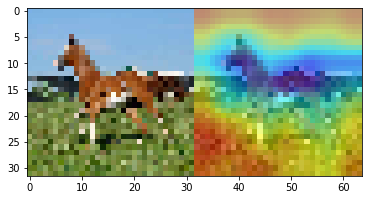

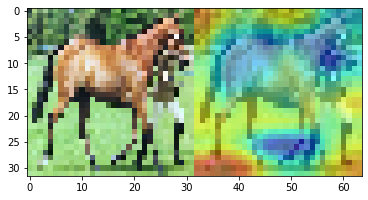

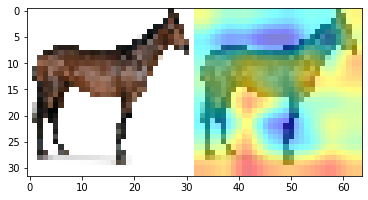

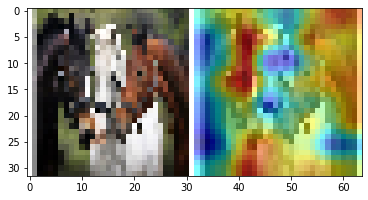

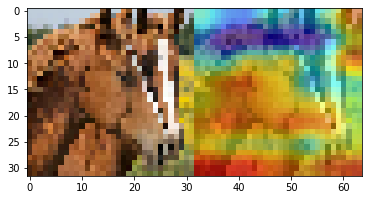

In [37]:
for k in range(len(images)):
  try:
    j = images[k]
    im = io.imread(j)
    im = cv2.resize(im, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    print(class_idx)
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("conv2d_138")

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    print(grads.shape)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    print(pooled_grads.shape)
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([x])

    for i in range(64):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis = -1)
    print(conv_layer_output_value.shape)
    print(heatmap.shape)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(im, 0.5, heatmap, 0.5, 0)
    
    # from google.colab.patches import cv2_imshow
    final = np.hstack((im, superimposed_img))
    # cv2_imshow(final)
    plot = plt.figure()
    plt.imshow(final)
    filename = j + ".jpg"
    plot.savefig(str(k) + '.jpg')
    
    plot.show()
    files.download(str(k) + '.jpg') 
  except Exception as e:
    print(e)

1. We get the predictions for the image
2. We take the topmost class index
3. Take output from the final convolutional layer

1. Compute the gradient of the class output value with respect to the feature map
2. Pool the gradients over all the axies leaving out the channel dimension
3. Weigh the output feature map with the computed gradient values

1. Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 
2. Normalize the heat map to make the values between 0 and 1